In [1]:
import pandas as pd
from pyhanlp import *
import jieba
import numpy as np

df = pd.read_excel('Lawsnote法律黑客松＿判決摘要.xlsx',sheet_name='慰撫金')

# 濾除雜質
for idx, row in df.iterrows():
    for col in df.columns:
        if type(df.iloc[idx][col]) == str:
            value = df.iloc[idx][col]
            value = value.strip()
            value = value.replace('未滿','').replace('不明','').replace('未主張','')
            value = value.replace('目前沒有工作','').replace('目前在監服刑','').replace('在監執行','')
            value = value.replace('無','').replace('目前在監服刑','').replace('在監執行','')
            df.iloc[idx][col] = value 
            
        if col == '年齡':
            if ('nan' in value) or (value == ''): df.iloc[idx][col] = 0
                    
                
                                        
# 留下必要row           
col = [c for c in df.columns if c not in ['法院']]
df = df.drop([0,1])
df = df.reset_index(drop=True)
df = df.dropna(subset=['最後判賠金額'])
df = df[df["犯罪類型"] != 'X']

In [2]:
df

,法院,主文,犯罪類型,職業,產業,階級,學歷,年齡,等級,數額,財產總額,財產種類,原告主張,原告年紀,被告主張,有利原告,有利被告,原告要求金額,最後判賠金額
0,臺灣新北地方法院107年訴字第1661號民事判決,臺灣新北地方法院民事判決107年度訴字第1661號原告0000-000000（真實姓名年籍均...,強制性交,"餐飲及溫泉會館,老闆",住宿及餐飲業,老闆,NaN,NaN,經濟狀況良好,1000000,NaN,NaN,服用藥物昏沈不能抗拒,52,,趁原告服用安眠藥法抗拒\n事後悔意從未道歉\n指稱原告設局引誘被告,NaN,800000,500000
2,臺灣高等法院107年上易字第56號民事判決,臺灣高等法院民事判決107年度上易字第56號上訴人王凱民訴訟代理人王俊傑律師被上訴人A女(0...,強制性交未遂,待業,NaN,NaN,大學肄業,NaN,NaN,52540,NaN,NaN,因酒醉不知不能抗拒,NaN,當日因飲酒過量精神恍惚\n證人之證詞互有矛盾\nDNA未為23種型別比對\n請求之賠償金額過高,被告利用原告酒醉不知不能抗拒,NaN,1300000,900000
3,臺灣新北地方法院107年訴字第727號民事判決,臺灣新北地方法院民事判決107年度訴字第727號原告林明子訴訟代理人蔣宗翰律師張君維被告徐松...,性騷擾,待業,NaN,NaN,國小畢業,NaN,NaN,36000,NaN,"投資:1,不動產:1",被告不滿原告以徒手拍打其臀部，而徒手反推原告\n原告當場倒地，造成原告背部外傷及骨折,NaN,正當防衛，傷害故意\n被告才是受害人,NaN,NaN,700000,50000
4,臺灣臺北地方法院106年醫字第16號民事判決,臺灣臺北地方法院民事判決106年度醫字第16號原告A女（真實姓名、住居所詳卷）訴訟代理人周珊...,性騷擾,醫師,醫療保健業,員工,NaN,NaN,NaN,1914876,NaN,NaN,被告趁原告尋求醫療協助之際，要求發生性行為\n醫療行為不當，致原告腿部神經病變,NaN,術前已盡評估之事\n原告為護士，於術前應已了解風險,趁病人不適且法逃脫醫師治療之依賴\n違反道德,NaN,300000,250000
5,臺灣高等法院臺中分院107年訴易字第78號民事判決,臺灣高等法院臺中分院民事判決107年度訴易字第78號原告A女（代號0000-000000）（...,強制性交,待業,NaN,NaN,專科肄業,NaN,輕度精神障礙\n存款\n領有重大傷病證明卡,0,NaN,NaN,被告明知其為低智商而強制性交,NaN,二人互有情愫\n並未暴力脅迫原告\n經濟能力不佳，不應請求高額求償金,被告明知其為低智商而強制性交,NaN,1000000,400000
6,臺灣臺中地方法院106年訴字第2586號民事判決,臺灣臺中地方法院民事判決106年度訴字第2586號原告A訴訟代理人錢炳村律師複代理人錢妍坊被...,強制性交,待業,NaN,NaN,高中畢業,NaN,NaN,0,NaN,汽車:1,因酒醉不知不能抗拒\n2次乘機性交,NaN,證詞前後矛盾\n法排除合意性交之可能,違反原告之意願2次乘機性交,NaN,800000,300000
9,臺灣嘉義地方法院107年訴字第300號民事判決,臺灣嘉義地方法院民事判決107年度訴字第300號原告0000-000000（真實姓名及住所均...,強制性交未遂,待業,NaN,NaN,NaN,NaN,,0,NaN,NaN,被告爬進原告房間\n趁其昏睡強制性交\n匿名恐嚇原告不得洩漏,20,被告沒有那麼多錢\n希望賠償金少一點,原告年紀輕，尚在追逐夢想年紀,NaN,3000000,850000
10,臺灣桃園地方法院107年訴字第561號民事判決,臺灣桃園地方法院民事判決107年度訴字第561號原告吳○○（姓名、住所詳卷）兼法定代理人吳○...,猥褻,待業,NaN,NaN,NaN,12,NaN,1048450,2540000,NaN,A女僅小六，長期被被告猥褻，致患PTSD\n期間並出現腦中有聲音、睡眠障礙、經常作惡夢、產生...,12,僅有2次猥褻行為,A女於事發時為12歲之少年，身心發育尚未成熟,NaN,400000,150000
11,臺灣基隆地方法院107年訴字第255號民事判決,臺灣基隆地方法院民事判決107年度訴字第255號原告林女（代號0000-000000，姓名年...,強制性交,待業,NaN,NaN,NaN,20,NaN,35000,NaN,NaN,趁其進房間詢問WIFI密碼之際強制性交\n造作原告林女之父、林女之母於親子關係中產生悲憤、沮...,13,請求駁回\n稱其此等資力負擔賠償金,NaN,原告案發後仍與被告視訊\n原告證詞前後矛盾,2000000,80000
12,臺灣桃園地方法院106年訴字第572號民事判決,臺灣桃園地方法院民事判決106年度訴字第572號原告A1（即AA2（即AA3（即AA4（即A...,強制性交,"機車行,員工",其他專業﹑科學及技術服務業,員工,國中肄業,NaN,NaN,80000,2140000,NaN,因酒醉不知不能抗拒,NaN,並趁機性交,足致原告身心受到極大創傷,NaN,800000,500000


# Preprocessing

In [3]:
def education(text):
    if text!= None and type(text) == str:
        try:
            text = text.replace('\n','')
            seg_list = jieba.cut(text)
            seg_list = [s for s in seg_list]

            seg_list_1 = "".join(seg_list[:-1])
            seg_list_2 = seg_list[-1]

            if 'nan' in seg_list_2: return [0,0]
            if seg_list_1 == '': return [seg_list_2]
            return [seg_list_1,seg_list_2]
        except Exception as e:
            return [0,0]
    else: return [0,0]

def study(v):
    level = 0
    if type(v[0]) == str:
        text = v[0]
        if text in ['國小']: level = 0
        elif text in ['初中','國中','國 中']: level =  1
        elif text in ['高中','高職','高工','家商']: level =  2
        elif text in ['大學','空中大學','二專','專科','大專','技術學院']: level =  3
        elif text in ['研究','碩士']: level =  4
        elif text in ['博士']: level =  5
        if len(v)>1:
            if '肄業' in v[1]: return (level-0.5)
            else: return level

    
def extract_age(text):
    if type(text) == str:
        seg_list = jieba.cut(text)
        for s in seg_list:
            if s.isdigit(): return int(s)
    else:
        return text   
    

    
    

# 年齡處理
df['年齡'] = df['年齡'].fillna(0)
df['年齡'] = df['年齡'].apply(extract_age)
age_count = [v for v in df['年齡'] if v > 0]
df['年齡'] = df['年齡'].apply(lambda x : x if x>0 else np.mean(age_count)) # 年齡填充


# 學歷處理  
df['學歷'] = df['學歷'].apply(education)
level_dict = [v[0] for v in df['學歷'] if type(v[0]) == str]
level_dict = ['國小','初中','國中','國 中','高中','高職','高工','大學','空中大學','二專','碩士']           
df['學歷'] = df['學歷'].apply(study)  
study_count = [v for v in df['學歷'] if v > 0]
df['學歷'] = df['學歷'].apply(lambda x : x if x>0 else np.mean(study_count)) # 學歷填充

# 原告年紀處理 
df['原告年紀'] = df['原告年紀'].fillna(0)
hurt_age_count = [int(v) for v in df['原告年紀'] if int(v) > 0]
df['原告年紀'] = df['原告年紀'].apply(lambda x : x if x>0 else np.max(hurt_age_count)) # 原告年紀

# df
df[['職業','產業','階級','學歷','年齡']].tail()

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\jack\AppData\Local\Temp\jieba.cache
Loading model cost 0.821 seconds.
Prefix dict has been built succesfully.


,職業,產業,階級,學歷,年齡
221,",公車司機",公共汽車客運業,員工,1.954955,36.272727
222,",法師",其他個人服務業,老闆,2.000000,36.272727
223,待業,NaN,NaN,1.954955,18.000000
224,",戲劇製作人","創作及藝術表演業, 藝文服務業",主管,1.954955,36.272727
225,待業,NaN,NaN,1.954955,36.272727


# 薪情平臺匯出資料_數額引用

In [4]:
# 數額填充
import operator
employee = pd.read_excel('Lawsnote法律黑客松＿判決摘要.xlsx',sheet_name='薪情平臺匯出資料') # 薪情平臺匯出資料

employee.head()  
employee_money ={} # 薪資排行榜
employee_mapping={} 
for idx, row in employee.iterrows():
    employee_money[list(row)[0]] = list(row)[2]    
    if type(list(row)[1]) == str:
        employee_mapping[list(row)[0]] = list(row)[1].split(',')
    

employee_rank = sorted(employee_money.items(), key=operator.itemgetter(1),reverse=True)
employee_rank = [e[0] for e in employee_rank]          

def fill_money(row):
    if row['數額']: return row['數額']
    else:
        return employee_money[row['產業']]

    
    
# df['數額'] = df.apply(fill_money)
df['階級'] = df['階級'].fillna('待業')
df['產業'] = df['產業'].fillna('待業')
# df['財產種類'] = df['財產種類'].fillna('無財產')
df[['職業','產業','階級','學歷','年齡','數額']].head()

,職業,產業,階級,學歷,年齡,數額
0,"餐飲及溫泉會館,老闆",住宿及餐飲業,老闆,1.954955,36.272727,1000000
2,待業,待業,待業,2.500000,36.272727,52540
3,待業,待業,待業,1.954955,36.272727,36000
4,醫師,醫療保健業,員工,1.954955,36.272727,1914876
5,待業,待業,待業,2.500000,36.272727,0


# 把犯罪類型、階級、財產種類做one hot encoding

In [5]:
# 刪除不必要的columns
df = df.drop(["法院", "主文", "職業", "產業", "等級", "財產總額"], axis=1)
# 所有\n化為，
df.replace('\n','，', inplace=True, regex=True)

# 刪除犯罪類型為nan的index
Nanlist = df[df["犯罪類型"].isnull().values==True].index.tolist()
df = df.drop(Nanlist)

df.reset_index(drop=True, inplace=True)
df.head()

,犯罪類型,階級,學歷,年齡,數額,財產種類,原告主張,原告年紀,被告主張,有利原告,有利被告,原告要求金額,最後判賠金額
0,強制性交,老闆,1.954955,36.272727,1000000,NaN,服用藥物昏沈不能抗拒,52,,趁原告服用安眠藥法抗拒，事後悔意從未道歉，指稱原告設局引誘被告,NaN,800000,500000
1,強制性交未遂,待業,2.500000,36.272727,52540,NaN,因酒醉不知不能抗拒,52,當日因飲酒過量精神恍惚，證人之證詞互有矛盾，DNA未為23種型別比對，請求之賠償金額過高,被告利用原告酒醉不知不能抗拒,NaN,1300000,900000
2,性騷擾,待業,1.954955,36.272727,36000,"投資:1,不動產:1",被告不滿原告以徒手拍打其臀部，而徒手反推原告，原告當場倒地，造成原告背部外傷及骨折,52,正當防衛，傷害故意，被告才是受害人,NaN,NaN,700000,50000
3,性騷擾,員工,1.954955,36.272727,1914876,NaN,被告趁原告尋求醫療協助之際，要求發生性行為，醫療行為不當，致原告腿部神經病變,52,術前已盡評估之事，原告為護士，於術前應已了解風險,趁病人不適且法逃脫醫師治療之依賴，違反道德,NaN,300000,250000
4,強制性交,待業,2.500000,36.272727,0,NaN,被告明知其為低智商而強制性交,52,二人互有情愫，並未暴力脅迫原告，經濟能力不佳，不應請求高額求償金,被告明知其為低智商而強制性交,NaN,1000000,400000


In [6]:
# df["財產種類"].unique()

In [7]:
#犯罪類型 one hot encoding
crime_df = pd.get_dummies(df["犯罪類型"])
crime_df.head()

,乘機性交,強制性交,強制性交、猥褻,強制性交未遂,性騷擾,猥褻,與未成年人合意性交
0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0


In [8]:
#階級 one hot encoding
level_df = pd.get_dummies(df["階級"])
level_df.head()

,主管,員工,待業,老闆
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,0,1,0


In [9]:
# 財產種類 one hot encoding
t_investment = 0   # 投資
t_real_estate = 0  # 不動產
t_car = 0          # 汽車
t_house = 0        # 房屋
t_land = 0         # 土地
t_motorcycle = 0   # 機車

investment = []   # 投資
real_estate = []  # 不動產
car = []          # 汽車
house = []        # 房屋
land = []         # 土地
motorcycle = []   # 機車

for index in df["財產種類"]:
    if not pd.isnull(index):
        comma = index.split(",")
        for item in comma:
            temp = item.split(":")
            if temp[1] == "n":        # n設定為5
                temp[1] = 5
            
            if temp[0] == "投資":
                t_investment = temp[1]
            elif temp[0] == "不動產":
                t_real_estate = temp[1]
            elif temp[0] == "汽車":
                t_car = temp[1]
            elif temp[0] == "房屋":
                t_house = temp[1]
            elif temp[0] == "土地":
                t_land = temp[1]
            elif temp[0] == "機車":
                t_motorcycle = temp[1]
        investment.append(t_investment)
        real_estate.append(t_real_estate)
        car.append(t_car)
        house.append(t_house)
        land.append(t_land)
        motorcycle.append(t_motorcycle)
        
        t_investment = 0   # 投資
        t_real_estate = 0  # 不動產
        t_car = 0          # 汽車
        t_house = 0        # 房屋
        t_land = 0         # 土地
        t_motorcycle = 0   # 機車
    else:
        investment.append(0)
        real_estate.append(0)
        car.append(0)
        house.append(0)
        land.append(0)
        motorcycle.append(0)

c = {"投資":investment,
     "不動產":real_estate,
     "汽車":car,
     "房屋":house,
     "土地":land,
     "機車":motorcycle}
belongings = pd.DataFrame(c)
belongings.head()

,投資,不動產,汽車,房屋,土地,機車
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,1,1,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [10]:
# 刪除columns(犯罪類型、階級、財產種類、原告年紀)
df = df.drop(["犯罪類型", "階級", "財產種類", "原告年紀"], axis=1)
df.head()

,學歷,年齡,數額,原告主張,被告主張,有利原告,有利被告,原告要求金額,最後判賠金額
0,1.954955,36.272727,1000000,服用藥物昏沈不能抗拒,,趁原告服用安眠藥法抗拒，事後悔意從未道歉，指稱原告設局引誘被告,NaN,800000,500000
1,2.500000,36.272727,52540,因酒醉不知不能抗拒,當日因飲酒過量精神恍惚，證人之證詞互有矛盾，DNA未為23種型別比對，請求之賠償金額過高,被告利用原告酒醉不知不能抗拒,NaN,1300000,900000
2,1.954955,36.272727,36000,被告不滿原告以徒手拍打其臀部，而徒手反推原告，原告當場倒地，造成原告背部外傷及骨折,正當防衛，傷害故意，被告才是受害人,NaN,NaN,700000,50000
3,1.954955,36.272727,1914876,被告趁原告尋求醫療協助之際，要求發生性行為，醫療行為不當，致原告腿部神經病變,術前已盡評估之事，原告為護士，於術前應已了解風險,趁病人不適且法逃脫醫師治療之依賴，違反道德,NaN,300000,250000
4,2.500000,36.272727,0,被告明知其為低智商而強制性交,二人互有情愫，並未暴力脅迫原告，經濟能力不佳，不應請求高額求償金,被告明知其為低智商而強制性交,NaN,1000000,400000


# Word Embedding 

In [11]:
dff_hack = pd.read_csv('D:\jupyter\legal_hackathon\dff_badpeople.csv',encoding = 'utf_8')
dff_hack['主文'].head()

0    臺灣橋頭地方法院民事判決108年度訴字第346號原告0000-000000（姓名、住址均詳卷...
1    臺灣臺北地方法院民事判決108年度訴字第270號原告33059701（真實姓名及送達處所均詳...
2                                                  NaN
3    臺灣士林地方法院民事判決108年度訴字第520號原告A女（姓名及住所詳卷）訴訟代理人詹凱勝律...
4    臺灣高等法院刑事判決108年度侵上訴字第14號上訴人臺灣臺北地方檢察署檢察官被告章君浩選任辯...
Name: 主文, dtype: object

In [12]:
from pyhanlp import *
seg_list_all = []
analyer = PerceptronLexicalAnalyzer()
for i in dff_hack['主文']:
    if type(i) == str:
        seg_list = analyer.segment(i)
        word_list = []
        for word_ in seg_list:
            word_list.append(word_)
        word_str = ' '.join(word_list)
        seg_list_all.append(word_str)
        seg_list_all.append(len(word_list))

#news.columns = ['label_num','label_name','content']
#print(len(news))
df_seg = pd.DataFrame(np.array(seg_list_all).reshape(int(len(seg_list_all)/2),2))
df_seg.columns = ['seg_word','word_count']
#news_all = pd.concat([news,df_seg],axis = 1)

In [13]:
df_seg.head()

,seg_word,word_count
0,臺灣 橋頭 地方法院 民事 判決 108 年度 訴 字 第 346 號 原告 0000-00...,1938
1,臺灣 臺 北地方法院 民事 判決 108 年度 訴 字 第270 號 原告 33059701...,2908
2,臺灣 士林 地方法院 民事 判決 108 年度 訴 字 第520 號 原告 A 女 （ 姓名...,2830
3,臺灣 高等 法院 刑事 判決 108 年度 侵 上訴 字 第 14 號 上訴 人 臺灣 臺 ...,5665
4,臺灣 屏東 地方法院 刑事 附帶 民事 訴訟 判決 107 年度 原 侵 附民 字 第 2 ...,1404


In [14]:
from keras.preprocessing.text import Tokenizer
## 使用Tokenizer對詞組進行編碼
## 當我們建立一個Tokenizer對象後，使用該對象的fit_on_texts()函数，以空格去便是每個詞,
## 可以將輸入的文本中的每個詞編號，編號是根據詞頻的，詞頻越大，編號越小。
max_words = 5000
max_len = 600
tok = Tokenizer(num_words=max_words)  ## 使用的最大詞語數为5000
tok.fit_on_texts(df_seg.seg_word)
## 使用word_index屬性可以看到每個詞對應的編碼
## 使用word_counts屬性可以看到每個詞對應的頻數
for ii,iterm in enumerate(tok.word_index.items()):
    if ii < 10:
        print(iterm)
    else:
        break
print("===================")  
for ii,iterm in enumerate(tok.word_counts.items()):
    if ii < 10:
        print(iterm)
    else:
        break

Using TensorFlow backend.


('，', 1)
('之', 2)
('、', 3)
('原告', 4)
('。', 5)
('被告', 6)
('為', 7)
('上訴', 8)
('人', 9)
('第', 10)
('臺灣', 2962)
('橋頭', 25)
('地方法院', 1449)
('民事', 3797)
('判決', 11594)
('108', 88)
('年度', 7226)
('訴', 5045)
('字', 7439)
('第', 21758)


In [15]:
#原告主張編碼
hack_seg_list = []
analyer = PerceptronLexicalAnalyzer()
for i in df['原告主張']:
    if type(i) == str:
        seg_list = analyer.segment(i)
        word_list = []
        for word_ in seg_list:
            word_list.append(word_)
        word_str = ' '.join(word_list)
        hack_seg_list.append(word_str)
        hack_seg_list.append(len(word_list))
    else:
        hack_seg_list.append('NaN')
        hack_seg_list.append(0)

#news.columns = ['label_num','label_name','content']
#print(len(news))
hack_seg = pd.DataFrame(np.array(hack_seg_list).reshape(int(len(hack_seg_list)/2),2))
hack_seg.columns = ['seg_word','word_count']
hack_seq = tok.texts_to_sequences(hack_seg.seg_word)

In [16]:
#被告主張編碼
hack_seg_list = []
analyer = PerceptronLexicalAnalyzer()
for i in df['被告主張']:
    if type(i) == str:
        seg_list = analyer.segment(i)
        word_list = []
        for word_ in seg_list:
            word_list.append(word_)
        word_str = ' '.join(word_list)
        hack_seg_list.append(word_str)
        hack_seg_list.append(len(word_list))
    else:
        hack_seg_list.append('NaN')
        hack_seg_list.append(0)

#news.columns = ['label_num','label_name','content']
#print(len(news))
hack_seg1 = pd.DataFrame(np.array(hack_seg_list).reshape(int(len(hack_seg_list)/2),2))
hack_seg1.columns = ['seg_word','word_count']
hack_seq1 = tok.texts_to_sequences(hack_seg1.seg_word)

In [17]:
#有利原告編碼
hack_seg_list = []
analyer = PerceptronLexicalAnalyzer()
for i in df['有利原告']:
    if type(i) == str:
        seg_list = analyer.segment(i)
        word_list = []
        for word_ in seg_list:
            word_list.append(word_)
        word_str = ' '.join(word_list)
        hack_seg_list.append(word_str)
        hack_seg_list.append(len(word_list))
    else:
        hack_seg_list.append('NaN')
        hack_seg_list.append(0)

#news.columns = ['label_num','label_name','content']
#print(len(news))
hack_seg2 = pd.DataFrame(np.array(hack_seg_list).reshape(int(len(hack_seg_list)/2),2))
hack_seg2.columns = ['seg_word','word_count']
hack_seq2 = tok.texts_to_sequences(hack_seg2.seg_word)

In [18]:
#有利被告編碼
hack_seg_list = []
analyer = PerceptronLexicalAnalyzer()
for i in df['有利被告']:
    if type(i) == str:
        seg_list = analyer.segment(i)
        word_list = []
        for word_ in seg_list:
            word_list.append(word_)
        word_str = ' '.join(word_list)
        hack_seg_list.append(word_str)
        hack_seg_list.append(len(word_list))
    else:
        hack_seg_list.append('NaN')
        hack_seg_list.append(0)

#news.columns = ['label_num','label_name','content']
#print(len(news))
hack_seg3 = pd.DataFrame(np.array(hack_seg_list).reshape(int(len(hack_seg_list)/2),2))
hack_seg3.columns = ['seg_word','word_count']
hack_seq3 = tok.texts_to_sequences(hack_seg3.seg_word)

In [19]:
from tensorflow.keras.preprocessing import sequence

## 將每個序列調整相同的長度
max_len = 80
hack_seq_mat = sequence.pad_sequences(hack_seq,maxlen=max_len)
hack_seq_mat1 = sequence.pad_sequences(hack_seq1,maxlen=max_len)
hack_seq_mat2 = sequence.pad_sequences(hack_seq2,maxlen=max_len)
hack_seq_mat3 = sequence.pad_sequences(hack_seq3,maxlen=max_len)

print(hack_seq_mat.shape)
print(hack_seq_mat1.shape)
print(hack_seq_mat2.shape)
print(hack_seq_mat3.shape)

(210, 80)
(210, 80)
(210, 80)
(210, 80)


In [20]:
hack_seq_mat = pd.DataFrame(hack_seq_mat)
hack_seq_mat1 = pd.DataFrame(hack_seq_mat1)
hack_seq_mat2 = pd.DataFrame(hack_seq_mat2)
hack_seq_mat3 = pd.DataFrame(hack_seq_mat3)

In [21]:
hack_seq_mat.head()

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1705,1128,391,566
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,60,741,686,391,566
2,0,0,0,0,0,0,0,0,0,0,...,4,1871,4226,1,306,4,2008,1831,12,2238
3,0,0,0,0,0,0,0,0,0,0,...,324,1,488,23,746,1,259,4,2930,4013
4,0,0,0,0,0,0,0,0,0,0,...,0,0,6,643,15,7,3143,28,93,59


# 刪除不必要的columns，concat所有dataframe，並分割資料

In [22]:
label = df["最後判賠金額"]
# 刪除columns(原告主張, 被告主張, 有利原告, 有利被告, 原告要求金額, 最後判賠金額)
df = df.drop(["原告主張", "被告主張", "有利原告", "有利被告", "原告要求金額", "最後判賠金額"], axis=1)

In [23]:
final_df = pd.concat([df,crime_df,level_df,belongings,hack_seq_mat,hack_seq_mat1,hack_seq_mat2,hack_seq_mat3],axis=1)

In [24]:
final_df.head()

,學歷,年齡,數額,乘機性交,強制性交,強制性交、猥褻,強制性交未遂,性騷擾,猥褻,與未成年人合意性交,...,70,71,72,73,74,75,76,77,78,79
0,1.954955,36.272727,1000000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.500000,36.272727,52540,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.954955,36.272727,36000,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.954955,36.272727,1914876,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.500000,36.272727,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
final_data = np.array(final_df)
label = np.array(label, dtype='float64')

In [26]:
from sklearn.model_selection import train_test_split

train_X,test_X,train_y,test_y = train_test_split(final_data,label, test_size=0.10, random_state=0)

# 模型訓練(lgbm)

In [27]:
import lightgbm as lgb

# Create the LightGBM data containers
train_data = lgb.Dataset(data=train_X,label=train_y)
test_data = lgb.Dataset(data=test_X,label=test_y)

In [36]:
param = {'boosting_type':'gbdt',
         'objective':'regression',
         
         'num_leaves':7, 
         'max_depth':4,
         'learning_rate':0.01,
         
         'metric': 'rmse',
         'subsample':1.0,
         'colsample_bytree':1.0,
         'n_estimators':100,
         'bagging_fraction': 1.0,
         'feature_fraction': 0.8,
         'min_child_samples':13,
         'reg_lambda': 0.08,
         'reg_alpha': 0
         
        }

model = lgb.train(param,train_data,valid_sets=test_data)#,num_boost_round=10,early_stopping_rounds=50)

[1]	valid_0's rmse: 362963
[2]	valid_0's rmse: 365034
[3]	valid_0's rmse: 367138
[4]	valid_0's rmse: 369259
[5]	valid_0's rmse: 371397
[6]	valid_0's rmse: 373539
[7]	valid_0's rmse: 373703
[8]	valid_0's rmse: 375552
[9]	valid_0's rmse: 377725
[10]	valid_0's rmse: 379344
[11]	valid_0's rmse: 379624
[12]	valid_0's rmse: 381657
[13]	valid_0's rmse: 382936
[14]	valid_0's rmse: 384630
[15]	valid_0's rmse: 386524
[16]	valid_0's rmse: 388733
[17]	valid_0's rmse: 390946
[18]	valid_0's rmse: 392656
[19]	valid_0's rmse: 394709
[20]	valid_0's rmse: 395196
[21]	valid_0's rmse: 396468
[22]	valid_0's rmse: 396995
[23]	valid_0's rmse: 399224
[24]	valid_0's rmse: 400659
[25]	valid_0's rmse: 401209
[26]	valid_0's rmse: 402921
[27]	valid_0's rmse: 404235
[28]	valid_0's rmse: 403932
[29]	valid_0's rmse: 404074
[30]	valid_0's rmse: 406295
[31]	valid_0's rmse: 406367
[32]	valid_0's rmse: 407742
[33]	valid_0's rmse: 408103
[34]	valid_0's rmse: 409385
[35]	valid_0's rmse: 409541
[36]	valid_0's rmse: 411110
[

D:\Anaconda\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


In [29]:
# 交叉驗證找參數
num_round = 1000
cv_results = lgb.cv(param, train_data, num_round, nfold=5, stratified=False, shuffle=True, metrics='rmse',
    early_stopping_rounds=50, verbose_eval=50, show_stdv=True, seed=0)

print('best n_estimators:', len(cv_results['rmse-mean']))
print('best cv score:', cv_results['rmse-mean'][-1])

D:\Anaconda\lib\site-packages\lightgbm\engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[50]	cv_agg's rmse: 822747 + 334045
[100]	cv_agg's rmse: 826453 + 333053
best n_estimators: 54
best cv score: 821860.5537902525


In [30]:
from sklearn.model_selection import GridSearchCV
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=7,
                              learning_rate=0.01, n_estimators=42, max_depth=5,
                              metric='rmse', bagging_fraction = 1.0,feature_fraction = 0.8)

params_test1={'max_depth': range(3,8,1), 'num_leaves':range(5, 20, 1)}

gsearch1 = GridSearchCV(estimator=model_lgb, param_grid=params_test1, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=4)
gsearch1.fit(train_X,train_y)
# gsearch1.grid_scores_
print(gsearch1.best_params_)
print(gsearch1.best_score_)
print(gsearch1.best_estimator_)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  48 tasks      | elapsed:   12.5s


{'max_depth': 5, 'num_leaves': 7}
-769706470372.4039
LGBMRegressor(bagging_fraction=1.0, boosting_type='gbdt', class_weight=None,
              colsample_bytree=1.0, feature_fraction=0.8,
              importance_type='split', learning_rate=0.01, max_depth=5,
              metric='rmse', min_child_samples=20, min_child_weight=0.001,
              min_split_gain=0.0, n_estimators=42, n_jobs=-1, num_leaves=7,
              objective='regression', random_state=None, reg_alpha=0.0,
              reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)


[Parallel(n_jobs=4)]: Done 375 out of 375 | elapsed:   15.1s finished
D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [37]:
Y_pred = model.predict(test_X)
Y_pred

array([ 572234.65645255,  610381.97383705,  884095.70535925,
        952116.79036239,  886901.43683471,  575022.96533206,
        626652.91239921,  916156.91012229,  460217.30350611,
        429018.91715459,  889332.57744443,  744476.57662309,
       1209042.29241318,  896281.80582466,  583258.79373626,
        720616.40858334,  628928.56000603,  566027.525379  ,
        642673.46943957,  619888.82232498,  596174.59094643])

In [38]:
test_y

array([ 900000.,  400000.,  600000.,  300000.,  250000.,  150000.,
       1200000.,  300000.,  800000., 1500000., 1000000.,  400000.,
        800000.,  250000.,  800000.,  700000.,  500000., 1000000.,
       1200000.,  500000.,  400000.])

In [39]:
error = []
for i in range(len(test_y)):
    error.append(test_y[i] - Y_pred[i])
    
#print("Errors: ", error)
#print(error)
squaredError = []
absError = []
for val in error:
    squaredError.append(val * val)#平方
    absError.append(abs(val))#誤差絕對值
    
#print("Square Error: ", squaredError)
#print("Absolute Value of Error: ", absError)
print("MSE = ", sum(squaredError) / len(squaredError))#平均平方誤差MSE


#from math import sqrt
#print("RMSE = ", sqrt(sum(squaredError) / len(squaredError)))#平均平方根誤差RMSE
print("MAE = ", sum(absError) / len(absError))#平均絕對誤差MAE

MSE =  216500409834.88034
MAE =  396222.3182408453


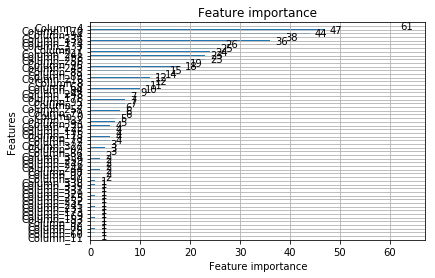

In [35]:
from lightgbm import plot_importance
from matplotlib import pyplot as plt
plot_importance(model)
plt.show()